In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as sklKMeans
from sklearn.metrics import silhouette_score


In [19]:
data = pd.read_csv("../datasets/iris.csv")

data

,sepal.lenght,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
X = data[["sepal.lenght","petal.length"]]
def kMeans(X,k):
    distortion = []
    for i in range(1,k+1):
        model = sklKMeans(n_clusters=i,init='random',n_init='auto',max_iter=10).fit(X.values)
        distortion.append(model.inertia_)
    print(distortion)
    print(f"Silhoutte Score for {k} cluster is {silhouette_score(X,model.labels_)}")
    return model,distortion
k=5
model,distortion = kMeans(X,k)
print(distortion)

C:\Users\GFLAB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GFLAB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GFLAB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GFLAB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[566.0320666666668, 112.96262731481484, 53.801351193126536, 34.314420779220775, 25.636859375524594]
Silhoutte Score for 5 cluster is 0.5615794939538516
[566.0320666666668, 112.96262731481484, 53.801351193126536, 34.314420779220775, 25.636859375524594]


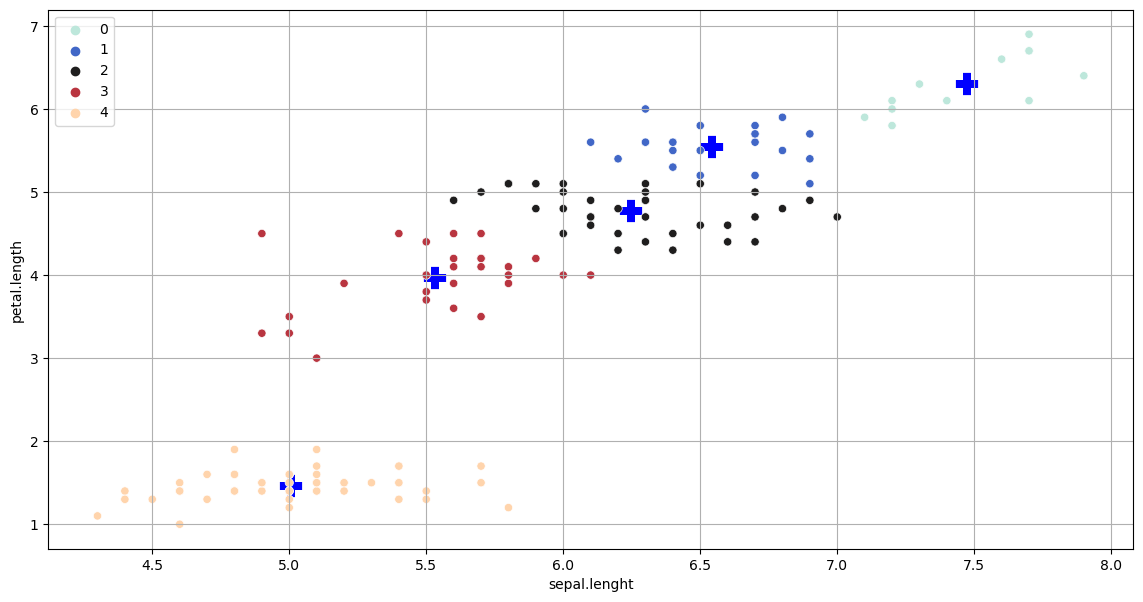

In [21]:
Centroids = model.cluster_centers_
Index = model.labels_
plt.figure(figsize=(14,7))
plt.scatter(x=Centroids[:,0],y=Centroids[:,1],marker="+",c='b',linewidth=16)
sns.scatterplot(data=data,x="sepal.lenght",y="petal.length",hue=Index,palette="icefire")
plt.grid()
plt.savefig("K-Means_iris")


5
5


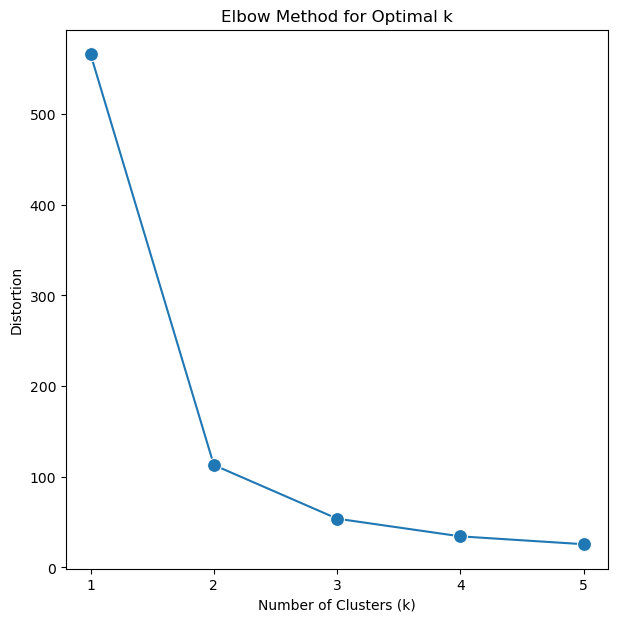

In [22]:
print(len(distortion))
print(k)

plt.figure(figsize=(7, 7))
sns.lineplot(x=np.arange(1, k + 1), y=np.array(distortion), marker="o", markersize=10)
plt.xticks(np.arange(1, k + 1))
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.show()


# GMM

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [38]:
def gen_data(k=3, dim=2, points_per_cluster=2000, lim=[-10, 10]):
    x = []
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = np.random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.3)
        ax.autoscale(enable=True)
    return x

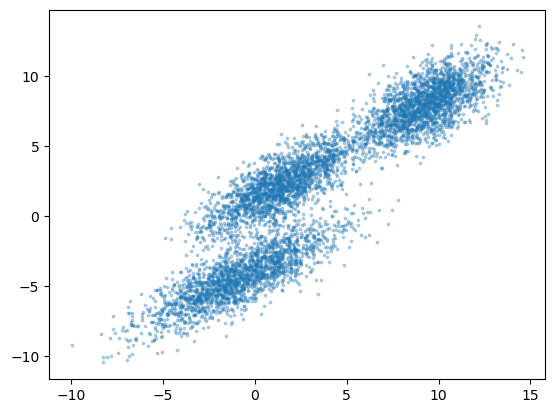

In [39]:
data = gen_data()


In [40]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(n_components=3)

C:\Users\GFLAB\AppData\Local\Temp\ipykernel_8264\3963498955.py:8: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1],180 + angle,color='r',alpha=0.5)


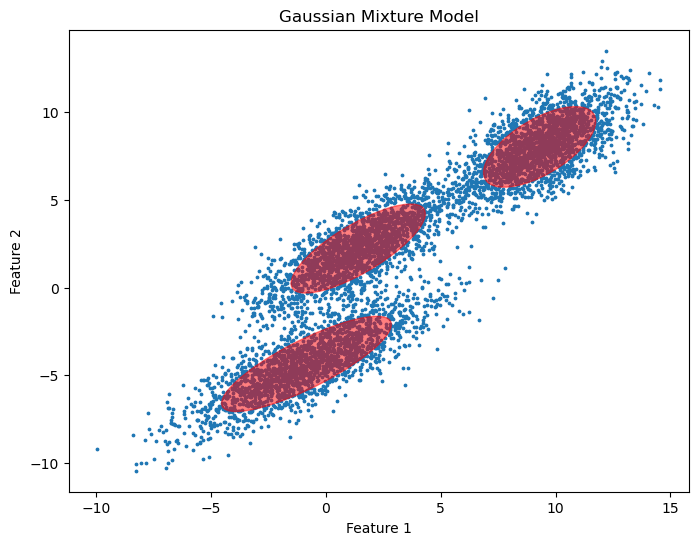

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1],s=3)
for covar, mean in zip(gmm.covariances_, gmm.means_):
    v, w = np.linalg.eigh(covar)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1],180 + angle,color='r',alpha=0.5)
    plt.gca().add_patch(ell)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.show()
